In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import mode
from collections import namedtuple, Counter, defaultdict
from math import log,ceil,sqrt

from sklearn import metrics
from math import exp,log10
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import csv
from sklearn.metrics import cohen_kappa_score
from sklearn.utils import shuffle

In [20]:
def plot_confusion_matrix(Y_actual,Y_predicted):
    conf_matrix =  metrics.confusion_matrix(Y_actual,Y_predicted)
    sns.heatmap(conf_matrix, annot=True,  fmt='')

In [21]:
####function to normalize the data##

def norm(Z):
    mean = np.sum(Z,axis=0)/len(Z)
    var = []
    for i in range(Z.shape[1]):
        sum1 = 0
        for j in range(Z.shape[0]):
            sum1 += (Z[j,i] - mean[i])**2
        var.append(1.0 *sum1/len(Z))

    for i in range(Z.shape[1]):
        for j in range(Z.shape[0]):
            Z[j,i] = (Z[j,i] - mean[i])/sqrt(var[i])
    
    
    
            
    return Z

In [22]:

def accuracy(Y,Y_hat):
                
    sum1 = sum([1 for i in range(len(Y)) if Y[i] == Y_hat[i]])
    return (1.0*sum1/len(Y))*100

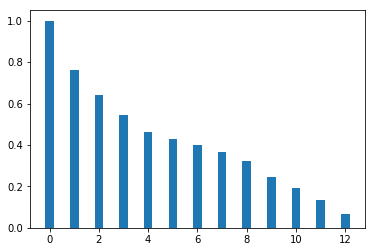

In [23]:

data_txt =open("processed.cleveland.data1.txt","r") 
data = data_txt.read()
data = data.split('\n')[:-1]


X = []
Y = []
for i in data:
    
    x_1 = i.split(',')
    temp=map(float,x_1)
    x=tuple(temp)
   
    
    Y.append(float(x[len(x)-1]))
    x = x[0:len(x)-1]   
    
        
    #print type(i)
    X.append(x)
    
X = np.array(X)

Y = np.reshape(np.array(Y),(len(Y),))
Y[Y > 0] = 1 ###changing the lables to 0 and 1

for i in range(X.shape[1]): #####imputing the missing values with mode of the feature
    m =  mode(X[:,i])[0][0]
    for j in range(X.shape[0]):
        if X[j][i] == -9:
            X[j][i] = m


X_norm = norm(X.copy())##normalizing the data

cov_matrix = np.dot(np.transpose(X_norm),X_norm)
eigen= np.linalg.eig(cov_matrix)
eigen_val = eigen[0]
#print eigen_val
eigen_vec = eigen[1]
#print( type(eigen_vec))
#print (eigen_vec)
#print (eigen_vec[0])
total_eigen_val = np.sum(eigen_val)
sum_d = []
for i in range(len(eigen_val)):
    sum_d.append(1. *np.sum(eigen_val[i:])/total_eigen_val)
width = 0.35
plt.bar(range(len(eigen_val)),sum_d,width)
plt.show()



W = eigen_vec[:,:]

Z = []
for i in X_norm:
    Z.append(np.dot(np.transpose(W),i))
Z = np.array(Z)

#print ("X's shape: ", X.shape)
#print ("Z's shape: ", Z.shape)
#print ("Y's shape: ", Y.shape)
#print(Z)

In [24]:
colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang','oldpeak','slope','ca','thal']
df = pd.DataFrame(data=X,columns=colnames)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


Accuracy of the CART is: 77.44360902255639

             precision    recall  f1-score   support

        0.0       0.81      0.77      0.79        74
        1.0       0.73      0.78      0.75        59

avg / total       0.78      0.77      0.78       133

Confusion Matrix


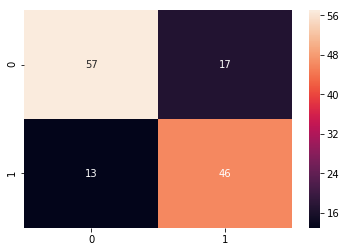

In [25]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#shuffle
Z,Y= shuffle(Z,Y, random_state=0)

# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(Z[:200], Y[:200])

# make predictions
Y_expect_Cart = Y[170:]
Y_predict_Cart= model.predict(Z[170:])
# summarize the fit of the model
print ("Accuracy of the CART is: %s" %(accuracy(Y[170:],Y_predict_Cart)))
print()
print(metrics.classification_report(Y_expect_Cart,Y_predict_Cart))


print ("Confusion Matrix")
print ("================")
plot_confusion_matrix(Y[170:],Y_predict_Cart)  

Accuracy of the ID3 is: 77.44360902255639

             precision    recall  f1-score   support

        0.0       0.53      0.50      0.51        74
        1.0       0.41      0.44      0.43        59

avg / total       0.48      0.47      0.48       133

Confusion Matrix


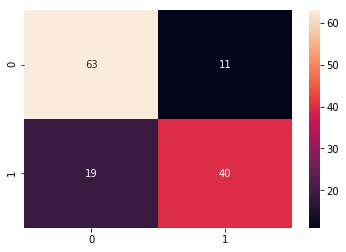

In [28]:
from id3 import Id3Estimator
from id3 import export_graphviz

#shuffle
Z,Y= shuffle(Z,Y, random_state=0)

# fit a ID3 model to the data
estimator = Id3Estimator()
estimator.fit(Z[:200], Y[:200])


# make predictions
Y_expect_ID3 = Y[170:]
Y_predict_ID3=estimator.predict(Z[170:])

# summarize the fit of the model

print ("Accuracy of the ID3 is: %s" %(accuracy(Y[170:],Y_predict_ID3)))
print()
print(metrics.classification_report(Y[170:],Y_predict_Cart))
print ("Confusion Matrix")
print ("================")
plot_confusion_matrix(Y[170:],Y_predict_ID3)  

Accuracy of the Random Forest Classifier is: 86.46616541353383

             precision    recall  f1-score   support

        0.0       0.89      0.86      0.87        72
        1.0       0.84      0.87      0.85        61

avg / total       0.87      0.86      0.86       133

Confusion Matrix


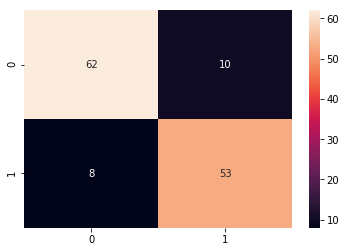

In [29]:
from sklearn.ensemble import RandomForestClassifier

#shuffle
Z,Y= shuffle(Z,Y, random_state=0)

# fit a Random Forest model to the data
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(Z[:200], Y[:200])

# make predictions
Y_expect_RF = Y[170:]
Y_predict_RF = rf.predict(Z[170:])


# summarize the fit of the model
print ("Accuracy of the Random Forest Classifier is: %s" %(accuracy(Y[170:],Y_predict_RF)))
print()
print(metrics.classification_report(Y[170:],Y_predict_RF))
print ("Confusion Matrix")
print ("================")
plot_confusion_matrix(Y[170:],Y_predict_RF)  

In [30]:
kappa_score_CART=cohen_kappa_score(Y_expect_Cart,Y_predict_Cart)
kappa_score_ID3=cohen_kappa_score(Y_expect_ID3,Y_predict_ID3)
kappa_score_RF=cohen_kappa_score(Y_expect_RF,Y_predict_RF)
print("Kappa Score for CART: %s" %(kappa_score_CART))
print("Kappa Score for ID3: %s" %(kappa_score_ID3))
print("Kappa Score for Random Forest: %s" %(kappa_score_RF))

Kappa Score for CART: 0.546178343949
Kappa Score for ID3: 0.53669298653
Kappa Score for Random Forest: 0.72813990461


In [31]:
mean_absolute_error_CART=metrics.mean_absolute_error(Y_expect_Cart, Y_predict_Cart)
mean_absolute_error_ID3=metrics.mean_absolute_error(Y_expect_ID3, Y_predict_ID3)
mean_absolute_error_RF=metrics.mean_absolute_error(Y_expect_RF, Y_predict_RF)
print("Mean Absolute Error For CART : %s"%(mean_absolute_error_CART))
print("Mean Absolute Error For ID3 : %s"%(mean_absolute_error_ID3))
print("Mean Absolute Error For Random Forest : %s"%(mean_absolute_error_RF))

Mean Absolute Error For CART : 0.225563909774
Mean Absolute Error For ID3 : 0.225563909774
Mean Absolute Error For Random Forest : 0.135338345865


In [32]:
root_mean_squared_error_CART=sqrt(metrics.mean_squared_error(Y_expect_Cart, Y_predict_Cart))
root_mean_squared_error_ID3=sqrt(metrics.mean_squared_error(Y_expect_ID3, Y_predict_ID3))
root_mean_squared_error_RF=sqrt(metrics.mean_squared_error(Y_expect_RF, Y_predict_RF))
print("Root Mean Squared Error For CART : %s"%(root_mean_squared_error_CART))
print("Root Mean Squared Error For CART : %s"%(root_mean_squared_error_ID3))
print("Root Mean Squared Error For CART : %s"%(root_mean_squared_error_RF))

Root Mean Squared Error For CART : 0.47493569014597764
Root Mean Squared Error For CART : 0.47493569014597764
Root Mean Squared Error For CART : 0.3678836036909795
